<a href="https://colab.research.google.com/github/tnwlvos/machinelearning2/blob/main/chap_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7634 - loss: 1.2431 - val_accuracy: 0.8620 - val_loss: 0.3823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8682 - loss: 0.3583 - val_accuracy: 0.8738 - val_loss: 0.3397
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8844 - loss: 0.3089 - val_accuracy: 0.8821 - val_loss: 0.3302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8949 - loss: 0.2775 - val_accuracy: 0.8845 - val_loss: 0.3121
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9038 - loss: 0.2541 - val_accuracy: 0.8915 - val_loss: 0.3022
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9123 - loss: 0.2322 - val_accuracy: 0.8907 - val_loss: 0.3063
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9174 - loss: 0.2150 - val_accuracy: 0.8962 - val_loss: 0.3054
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9213 - loss: 0.2038 - val_accura

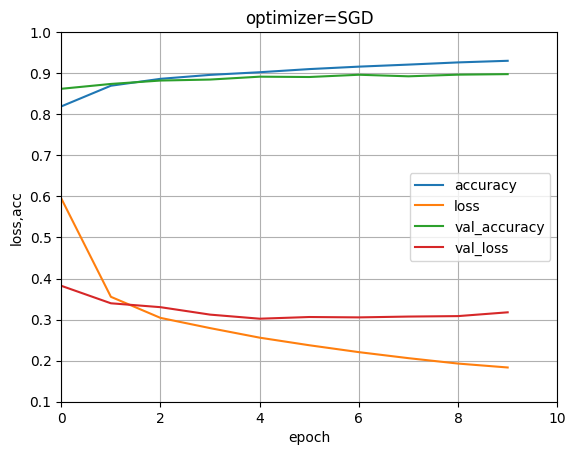

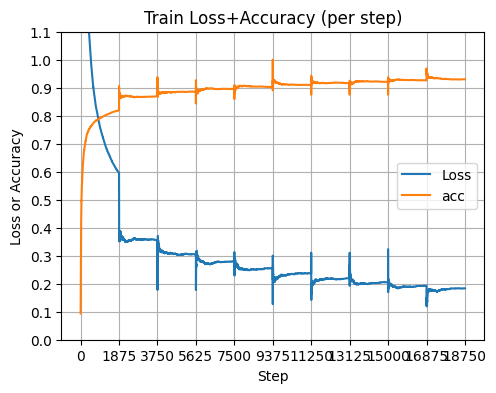

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import Callback

#특정 데이터 셋을 train, test set으로 나눠주는 함수
def Divide_data_set(new_xy_np,train,test):


    #가져온 데이터의 비율을 구함
    rate=len(new_xy_np)//10

    #데이터 나눌 구간
    train_rate=train*rate
    test_rate=test*rate+train_rate

    #인덱스 셔플
    np.random.shuffle(new_xy_np)

    #데이터set 나누기
    Training_set=new_xy_np[0:train_rate,:]
    Test_set=new_xy_np[train_rate:test_rate,:]
    data=pd.DataFrame(Training_set)


    Training_set=data.to_numpy(dtype="float32")#데이터 프레임을 넘파이 배열로 형변환
    data=pd.DataFrame(Test_set)


    Test_set=data.to_numpy(dtype="float32")#데이터 프레임을 넘파이 배열로 형변환


    return Training_set,Test_set

#one-hot encoding함수
def One_Hot_Encoding(data_y):
    N=len(data_y)#데이터의 총 개수
    Q_class=np.unique(data_y)#클래스 종류
    Q=len(Q_class)#클래스 개수

    #one-hot-y초기화
    one_hot_y=np.zeros([N,Q])
    #각 클래스에 대해 One-Hot 표현으로 변환
    for k in np.arange(0,N,1):
        #해당 비교값이 자동으로 float형으로 변환 되어 저장됨(넘파이 배열 특징)
        one_hot_y[k,:]=(data_y[k]==Q_class)

    return one_hot_y
# data=pd.read_csv("C:\\Users\\User\\Downloads\\NN_data.csv")
# data=np.array(data, dtype=np.float32)
train=7
test=3



class StepHistory(Callback):
    def on_train_begin(self, logs=None):
        self.step_losses = []
        self.step_acc = []

    def on_train_batch_end(self, batch, logs=None):
        self.step_losses.append(logs.get('loss'))
        self.step_acc.append(logs.get('accuracy'))

step_history = StepHistory()
# train,test=Divide_data_set(data.copy(), train, test)

# x_train=train[:,:3]
# y_train=train[:,3]
# x_test=test[:,:3]
# y_test=test[:,3]
# (x_train, y_train),(x_test, y_test)=mnist.load_data()
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()

y_train=One_Hot_Encoding(y_train)
y_test=One_Hot_Encoding(y_test)
model=keras.models.Sequential([
    keras.layers.Conv2D(100,7,activation="relu",strides=(1,1),padding="same",input_shape=[28,28,1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units= 512, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units= 256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units= 10, activation='softmax'),
    ])

optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data = (x_test, y_test), verbose=1,callbacks=[step_history])

pd.DataFrame(history.history).plot()

plt.title("optimizer=SGD")
plt.xlabel("epoch")
plt.ylabel("loss,acc")
plt.grid(True)
plt.gca().set_ylim(0.1,1.0)
plt.xlim(0,10)
plt.show()


step = 1875
#  Step 단위 그래프
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(step_history.step_losses,label="Loss")
plt.plot(step_history.step_acc,label="acc")
plt.title("Train Loss+Accuracy (per step)")
plt.gca().set_ylim(0,1.0)

plt.xlabel("Step")
plt.ylabel("Loss or Accuracy")
plt.legend()
plt.xticks(range(0, len(step_history.step_losses)+1, step))
plt.yticks(np.arange(0, 1.2, 0.1))
plt.grid(True)
plt.show()